In [1]:
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive # gdrive 연동
drive.mount('/content/drive')

Mounted at /content/drive


## 10만개 데이터

In [3]:
# Disease 

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_dis_vs_nor.csv', encoding='cp949') # upsampling 안된 것!
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,0,1,116,78,94,16.6,0
1,0,1,100,60,79,22.3,0
2,0,1,100,60,87,21.9,0
3,0,1,111,70,72,20.2,0
4,0,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
999995,1,27,120,70,81,23.1,1
999996,1,27,110,70,104,27.2,1
999997,1,27,115,53,110,25.2,1
999998,1,27,120,70,90,19.7,1


In [4]:
df.notnull().sum()

SEX      1000000
BTH_G    1000000
SBP      1000000
DBP      1000000
FBS      1000000
BMI      1000000
Dis      1000000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   BMI     1000000 non-null  float64
 6   Dis     1000000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


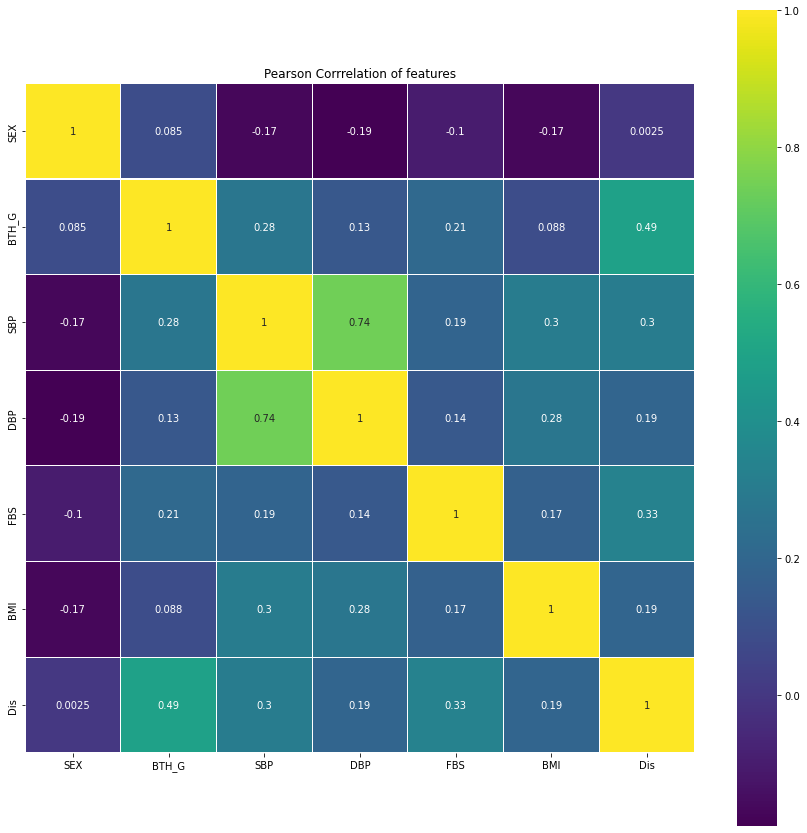

In [6]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

In [7]:
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Dis'],df['Dis'],  stratify=df['Dis'], shuffle=True, test_size=0.9, random_state=11)

X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.88, shuffle=True) # validation은 사용하지 않음


print(X_train.shape)
print(y_train.shape)
print(X_val.shape) # validation set은 사용하지 않음
print(y_val.shape) # 역시
print(X_test.shape)
print(y_test.shape)

(100000, 6)
(100000,)
(792000, 6)
(792000,)
(108000, 6)
(108000,)


In [8]:
X_train.shape

(100000, 6)

In [9]:
X_test.shape

(108000, 6)

In [10]:
y_train.shape

(100000,)

In [11]:
y_test.shape

(108000,)

**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀


LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_train,y_train)

print("train score : {}".format(LR.score(X_train, y_train)))

predict_y = LR.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, LR.predict(X_test)))
print("test score : {}".format(LR.score(X_test, y_test)))

train score : 0.8193
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     79880
           1       0.69      0.54      0.61     28120

    accuracy                           0.82    108000
   macro avg       0.77      0.73      0.74    108000
weighted avg       0.81      0.82      0.81    108000

test score : 0.8173796296296296


## Upsampling 데이터

In [13]:
# Disease 

df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/aiffel_data/Hackerton_2/data_over_sampling.csv', encoding='cp949') # upsampling 안된 것!
df2

,SEX,BTH_G,SBP,DBP,FBS,BMI,Dis
0,1,1,116,78,94,16.6,0
1,1,1,100,60,79,22.3,0
2,1,1,100,60,87,21.9,0
3,1,1,111,70,72,20.2,0
4,1,1,120,80,98,20.0,0
...,...,...,...,...,...,...,...
1481319,0,25,120,80,78,27.9,1
1481320,0,27,150,74,133,32.0,1
1481321,1,25,120,70,118,26.9,1
1481322,0,20,136,68,93,21.5,1


In [14]:
df2.notnull().sum()

SEX      1481324
BTH_G    1481324
SBP      1481324
DBP      1481324
FBS      1481324
BMI      1481324
Dis      1481324
dtype: int64

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481324 entries, 0 to 1481323
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1481324 non-null  int64  
 1   BTH_G   1481324 non-null  int64  
 2   SBP     1481324 non-null  int64  
 3   DBP     1481324 non-null  int64  
 4   FBS     1481324 non-null  int64  
 5   BMI     1481324 non-null  float64
 6   Dis     1481324 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB


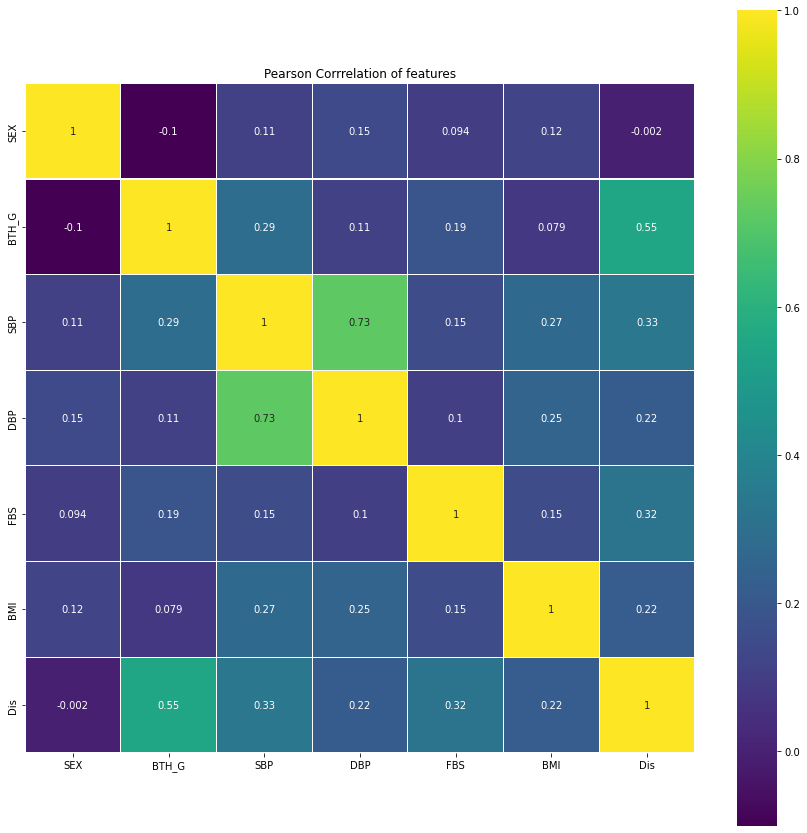

In [16]:
colormap = plt.cm.viridis # pearson 상관 계수 확인 ---> heatmap
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(df2.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white')

In [17]:
# Over sampling data
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(df2.loc[:, df2.columns != 'Dis'],df2['Dis'],  stratify=df2['Dis'], shuffle=True, test_size=0.9, random_state=11)

X_up_test,X_up_val,y_up_test,y_up_val=train_test_split(X_up_test,y_up_test,test_size=0.88, shuffle=True) # validation은 사용하지 않음


print(X_up_train.shape)
print(y_up_train.shape)
print(X_up_val.shape) # validation set은 사용하지 않음
print(y_up_val.shape) # 역시
print(X_up_test.shape)
print(y_up_test.shape)

(148132, 6)
(148132,)
(1173209, 6)
(1173209,)
(159983, 6)
(159983,)


In [18]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_up_train,y_up_train)

print("train score : {}".format(LR.score(X_up_train, y_up_train)))

predict_y = LR.predict(X_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, LR.predict(X_up_test)))
print("test score : {}".format(LR.score(X_up_test, y_up_test)))

train score : 0.7903694002646289
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     80101
           1       0.79      0.80      0.79     79882

    accuracy                           0.79    159983
   macro avg       0.79      0.79      0.79    159983
weighted avg       0.79      0.79      0.79    159983

test score : 0.7901652050530369


## 전체 데이터

In [19]:
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Dis'],df['Dis'],  stratify=df['Dis'], shuffle=True, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
# print(X_val.shape) # validation set은 사용하지 않음
# print(y_val.shape) # 역시
print(X_test.shape)
print(y_test.shape)

(800000, 6)
(800000,)
(200000, 6)
(200000,)


In [20]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_train,y_train)

print("train score : {}".format(LR.score(X_train, y_train)))

predict_y = LR.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, LR.predict(X_test)))
print("test score : {}".format(LR.score(X_test, y_test)))

train score : 0.81836625
              precision    recall  f1-score   support

           0       0.85      0.91      0.88    148132
           1       0.69      0.54      0.60     51868

    accuracy                           0.82    200000
   macro avg       0.77      0.73      0.74    200000
weighted avg       0.81      0.82      0.81    200000

test score : 0.816305


## 전체 Upsampling 데이터 

In [21]:
# Over sampling data
# split data

from sklearn.model_selection import train_test_split

# 전체 데이터 split
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(df2.loc[:, df2.columns != 'Dis'],df2['Dis'],  stratify=df2['Dis'], shuffle=True, test_size=0.2, random_state=11)

# X_up_test,X_up_val,y_up_test,y_up_val=train_test_split(X_up_test,y_up_test,test_size=0.88, shuffle=True) # validation은 사용하지 않음


print(X_up_train.shape)
print(y_up_train.shape)
# print(X_up_val.shape) # validation set은 사용하지 않음
# print(y_up_val.shape) # 역시
print(X_up_test.shape)
print(y_up_test.shape)

(1185059, 6)
(1185059,)
(296265, 6)
(296265,)


In [22]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

LR = LogisticRegression() # 로지스틱 회귀 분석
LR.fit(X_up_train,y_up_train)

print("train score : {}".format(LR.score(X_up_train, y_up_train)))

predict_y = LR.predict(X_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, LR.predict(X_up_test)))
print("test score : {}".format(LR.score(X_up_test, y_up_test)))

train score : 0.789912569753911
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    148132
           1       0.78      0.80      0.79    148133

    accuracy                           0.79    296265
   macro avg       0.79      0.79      0.79    296265
weighted avg       0.79      0.79      0.79    296265

test score : 0.7895330194251767


SGDclassifier

**전체 Upsampling Data**

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_up_train, y_up_train)

print("train score : {}".format(sgd_clf.score(X_up_train, y_up_train)))

predict_y = sgd_clf.predict(X_up_test)

from sklearn.metrics import classification_report
print(classification_report(y_up_test, sgd_clf.predict(X_up_test)))
print("test score : {}".format(sgd_clf.score(X_up_test, y_up_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


train score : 0.7728248129418029
              precision    recall  f1-score   support

           0       0.76      0.80      0.78    148132
           1       0.79      0.75      0.77    148133

    accuracy                           0.77    296265
   macro avg       0.77      0.77      0.77    296265
weighted avg       0.77      0.77      0.77    296265

test score : 0.7726089818237051


In [25]:
print(confusion_matrix(y_up_test, predict_y))

[[118243  29889]
 [ 37479 110654]]


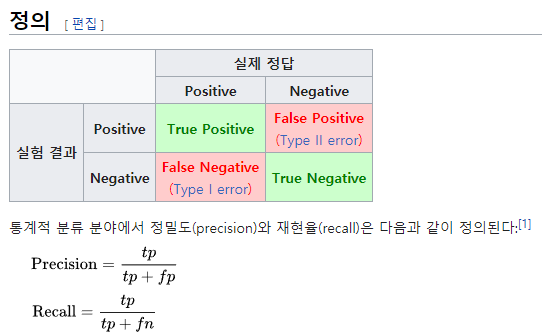

In [30]:
from sklearn.metrics import precision_score, recall_score
# 정밀도 값
# 스팸메일 필터에서 많이 쓰인다. 정상 메일을 스팸처리해서 삭제해버리면 안되기 때문 FP값: 실제 음성(정상)인데 양성(스팸)이라고 판별
precision_score(y_up_test, predict_y)

0.7873319909209281

In [29]:
# 재현율 값 
# 진단 분야에서는 재현율 값이 중요! 왜냐하면 환자를 정상으로 판별하면 안되기 때문이다. FN값 : 양성(환자)을 음성(정상)으로 판단
recall_score(y_up_test, predict_y)

0.7469908798174614

In [36]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_up_test, predict_y)

정밀도와 재현율의 조화 평균으로 나타낸 F1 score

In [31]:
from sklearn.metrics import f1_score
f1_score(y_up_test, predict_y)

0.7666311019967023

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_up_test, predict_y)

In [39]:
fpr, tpr, threshold = roc_curve(y_up_test, predict_y)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.20177274 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.74699088 1.        ]


ROC curve plot

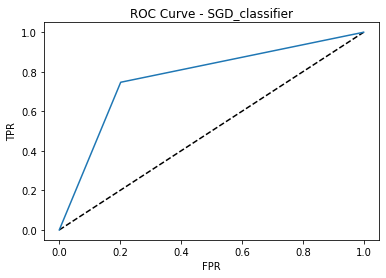

In [40]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "SGD_classifier")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - SGD_classifier")
plt.show()

[Hyperparameter 정보들](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

[Hyperparameter 정보들2](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)